In [16]:
import matplotlib
# %matplotlib inline
import os
import numpy as np
import seaborn as sns # for plots
import pandas as pd
import matplotlib.pyplot as plt

import SUITPy as suit
import surfAnalysisPy as sa
import nibabel as nb
import nitools as nt

import Functional_Fusion.dataset as fdata
import Functional_Fusion.atlas_map as am


import selective_recruitment.plotting as splotting
import selective_recruitment.scripts.script_overlap_map_wm as soverlap
import selective_recruitment.scripts.depricated.script_roi_similarity as ssimil
import selective_recruitment.plotting as splotting
import selective_recruitment.region as sroi
import selective_recruitment.globals as gl

from statsmodels.stats.anova import AnovaRM # perform F test
from matplotlib.colors import LinearSegmentedColormap
import PcmPy as pcm
from nilearn import plotting
from pathlib import Path

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.colors import ListedColormap
import plotly.express as px


import warnings
warnings.filterwarnings('ignore')

# Correlation between forwards and backwards per load per phase

## Parcellation

In [2]:
D = ssimil.calc_corr_per_load(atlas_space = "SUIT3", 
                        subj = None,
                        ses_id = "ses-02", 
                        smooth = False, 
                        parcellation="NettekovenSym68c32", 
                        subtract_mean = True, 
                        type = "CondAll", 
                        verbose = False)

<AxesSubplot: xlabel='load', ylabel='R_fwbw'>

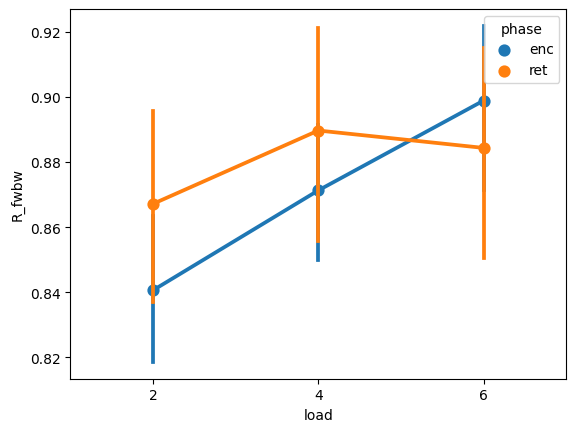

In [3]:
roi_name = "D3R"
DD = D.loc[D.roi_name == roi_name]
sns.pointplot(data = DD, x = "load", y = "R_fwbw", hue = "phase")

## Parcellation divided into anterior and posterior

In [4]:
D = ssimil.calc_corr_per_load(atlas_space = "SUIT3", 
                        subj = None,
                        ses_id = "ses-02", 
                        smooth = False, 
                        parcellation="NettekovenSym68c32AP", 
                        subtract_mean = True, 
                        type = "CondAll", 
                        verbose = False)

In [5]:
# add a new field defining hemi and anterior vs posterior
D["half"] = D["roi_name"].str[-1]
D["hemi"] = D["roi_name"].str[2]
D = D.loc[D.roi != 0]
print(AnovaRM(data=D.loc[D.hemi == "R"], depvar='R_fwbw',
              subject='sn', within=["load", "phase", "half"], aggregate_func=np.mean).fit())

                    Anova
                F Value Num DF  Den DF Pr > F
---------------------------------------------
load            16.7775 2.0000 30.0000 0.0000
phase           20.4442 1.0000 15.0000 0.0004
half            10.8530 1.0000 15.0000 0.0049
load:phase       6.2008 2.0000 30.0000 0.0056
load:half        2.5546 2.0000 30.0000 0.0945
phase:half       1.7879 1.0000 15.0000 0.2011
load:phase:half  0.1313 2.0000 30.0000 0.8775



<AxesSubplot: xlabel='load', ylabel='R_fwbw'>

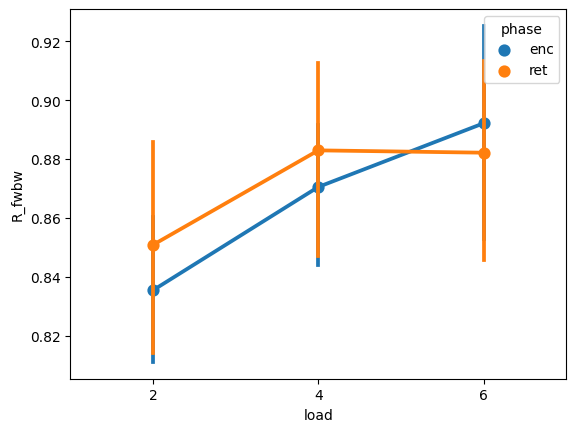

In [6]:
roi_name = "D3R_A"
DD = D.loc[D.roi_name == roi_name]
sns.pointplot(data = DD, x = "load", y = "R_fwbw", hue = "phase")

In [7]:
print(AnovaRM(data=DD, depvar='R_fwbw',
              subject='sn', within=["load", "phase"], aggregate_func=np.mean).fit())

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
load        8.1290 2.0000 30.0000 0.0015
phase       0.1021 1.0000 15.0000 0.7537
load:phase  1.7753 2.0000 30.0000 0.1868



### roi similarity between all the subregions within parcellation

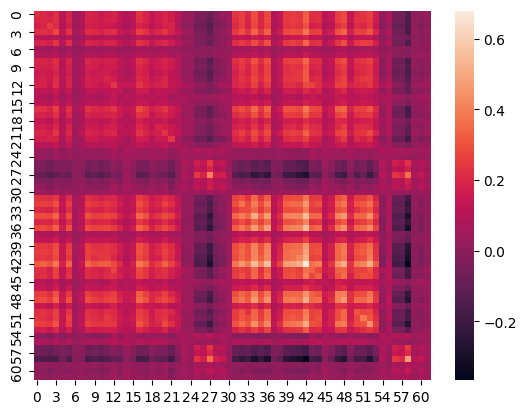

In [8]:
G_all, Ginf_all = ssimil.calc_G(center = False, subj = None, reorder = None, do_D = False)
GG_all = np.mean(G_all, axis = 0)
ax = sns.heatmap(GG_all, annot=False, fmt=".1f")
# ax.set_xticks(Ginf_all['region_id'].values-0.5)
# ax.set_yticks(Ginf_all['region_id'].values-0.5)
# ax.set_xticklabels(labels = Ginf_all['region_name'].values, rotation = 90)
# ax.set_yticklabels(labels = Ginf_all['region_name'].values, rotation = 0)

AttributeError: module 'selective_recruitment.plotting' has no attribute 'plot_MDS'

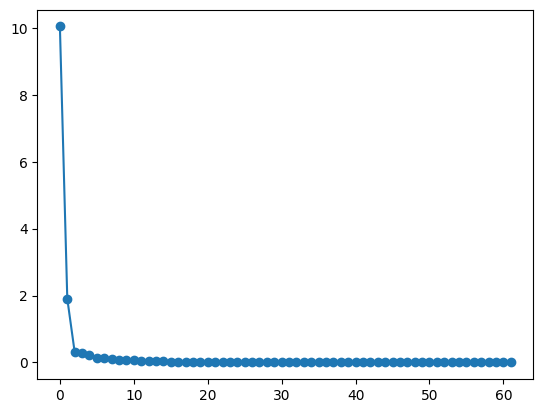

<Figure size 640x480 with 0 Axes>

In [9]:
W_all, Glam_all = pcm.classical_mds(GG_all,contrast=None,align=None,thres=0)
# get info for D regions
Dinfo, D_indx, colors_D = ssimil.get_region_info_all(label = 'NettekovenSym68c32AP')
plt.plot(Glam_all, 'o-')
plt.figure()
splotting.plot_MDS(W_all[:, 1], W_all[:, 2], Dinfo[1:], colors_D[1:], text_size = 'small', text_weight = 'regular')

### roi similarity between all the subregions within parcellation limited to D subregions

(16, 16)


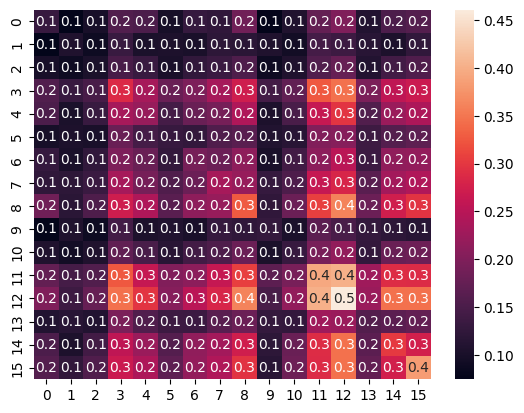

In [12]:
G, Ginf= ssimil.calc_G(center = False, subj = None, reorder = ["side", "AP"], do_D = True)
GG = np.mean(G, axis = 0)
print(GG.shape)
ax = sns.heatmap(GG, annot=True, fmt=".1f")
# ax.set_xticks(Ginf['region_id'].values+0.5)
# ax.set_yticks(Ginf['region_id'].values+0.5)
# ax.set_xticklabels(labels = Ginf['region_name'].values, rotation = 90)
# ax.set_yticklabels(labels = Ginf['region_name'].values, rotation = 0)

In [17]:
W, Glam = pcm.classical_mds(GG,contrast=None,align=None,thres=0)
# get info for D regions
Dinfo, D_indx, colors_D = sroi.get_region_info(label = 'NettekovenSym68c32AP')
# plt.plot(Glam, 'o-')
# plt.figure()
# print(W.shape)
# splotting.plot_MDS(W[:, 0], W[:, 1], Dinfo, colors_D, text_size = 'small', text_weight = 'regular')
# splotting.plot_MDS(W[:, 0], W[:, 2], Dinfo, colors_D, text_size = 'small', text_weight = 'regular')
# splotting.plot_MDS(W[:, 1], W[:, 2], Dinfo, colors_D, text_size = 'small', text_weight = 'regular')

In [41]:
# adding the components to the D region info dataframe
Dinfo["comp_0"] = W[:, 0]
Dinfo["comp_1"] = W[:, 1]
Dinfo["comp_2"] = W[:, 2]
# add index
Dinfo["idx"] = Dinfo["roi_name"].str[1].astype(int)
Dinfo

fig = px.scatter_3d(Dinfo, x="comp_0", y="comp_1", z="comp_2", symbol='idx')
print(len(fig.data))
# tight layout
# fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

# x_min = min(fig.data.x)
# fig.show()

4


## using RSA toolbox and D3 RDM as model RDM

In [ ]:
import rsatoolbox as rsa